# 1. Develop a credit risk assessment Classification model with Support Vector Machines using both linear and non-linear kernels and evaluate their performance.

2. Develop an image classification model with SVC

3. Build a Regression model with SVR

In [1]:
data.describe().T

NameError: name 'data' is not defined

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 2)
print('*************************Training linear SVM model********************************\n')
linear_svm_model=LinearSVC()
print('Training started....\n')
linear_svm_model.fit(xtrain, ytrain)
print('Training completed....\n')

print('Testing invoked....\n')
y_pred_linear = linear_svm_model.predict(xtest)
print('Predicted total is....\n', y_pred_linear)
print('\nTesting is also completed.....\n')

NameError: name 'x' is not defined

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(ytest, y_pred_linear)
precision = precision_score(ytest, y_pred_linear, average='weighted')  
recall = recall_score(ytest, y_pred_linear, average='weighted')  
f1 = f1_score(ytest, y_pred_linear, average='weighted') 

print("***************SVM Model's Performance****************")
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

***************SVM Model's Performance****************

Accuracy: 0.7536231884057971
Precision: 0.7495306438320368
Recall: 0.7536231884057971
F1 Score: 0.7514090177133654


In [3]:

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=2)

print('**************************Training non-linear SVM model*********************************\n')
non_linear_svm_model = SVC(kernel='rbf')
print('Training started....\n')
non_linear_svm_model.fit(xtrain, ytrain)
print('Training completed....\n')

print('Testing invoked....\n')
y_pred_non_linear = non_linear_svm_model.predict(xtest)
print('Predicted total is....\n', np.unique(y_pred_non_linear))
print('\nTesting is also completed.....\n')

NameError: name 'x' is not defined

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("***************Non-Linear SVM Model's Performance****************\n")
print('Mean Squared Error:\t',mean_squared_error(ytest,y_pred_non_linear))
print()
print('RMSE:\t',np.sqrt(mean_squared_error(ytest,y_pred_non_linear)))
print()
print('R-Square value:\t',r2_score(ytest,y_pred_non_linear))

***************Non-Linear SVM Model's Performance****************

Mean Squared Error:	 0.2536231884057971

RMSE:	 0.5036101551853349

R-Square value:	 -0.2924805994112927


In [22]:
print('*************Hyperparameters for linear SVM models***************\n')
print(linear_svm_model.get_params())
print()
print('*************Hyperparameters for non-linear SVM models***************\n')
print(non_linear_svm_model.get_params())

*************Hyperparameters for linear SVM models***************

{'C': 1.0, 'class_weight': None, 'dual': 'warn', 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': None, 'tol': 0.0001, 'verbose': 0}

*************Hyperparameters for non-linear SVM models***************

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [13]:
data=pd.read_csv('bankloans.csv')
data.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


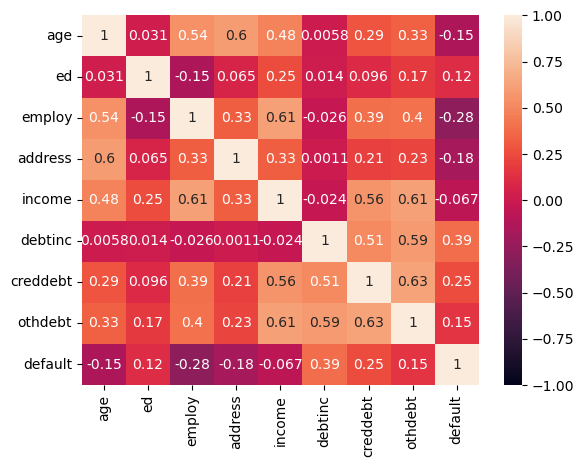

In [14]:
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1)
plt.show()

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'ed'}>,
        <Axes: title={'center': 'employ'}>],
       [<Axes: title={'center': 'address'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'debtinc'}>],
       [<Axes: title={'center': 'creddebt'}>,
        <Axes: title={'center': 'othdebt'}>,
        <Axes: title={'center': 'default'}>]], dtype=object)

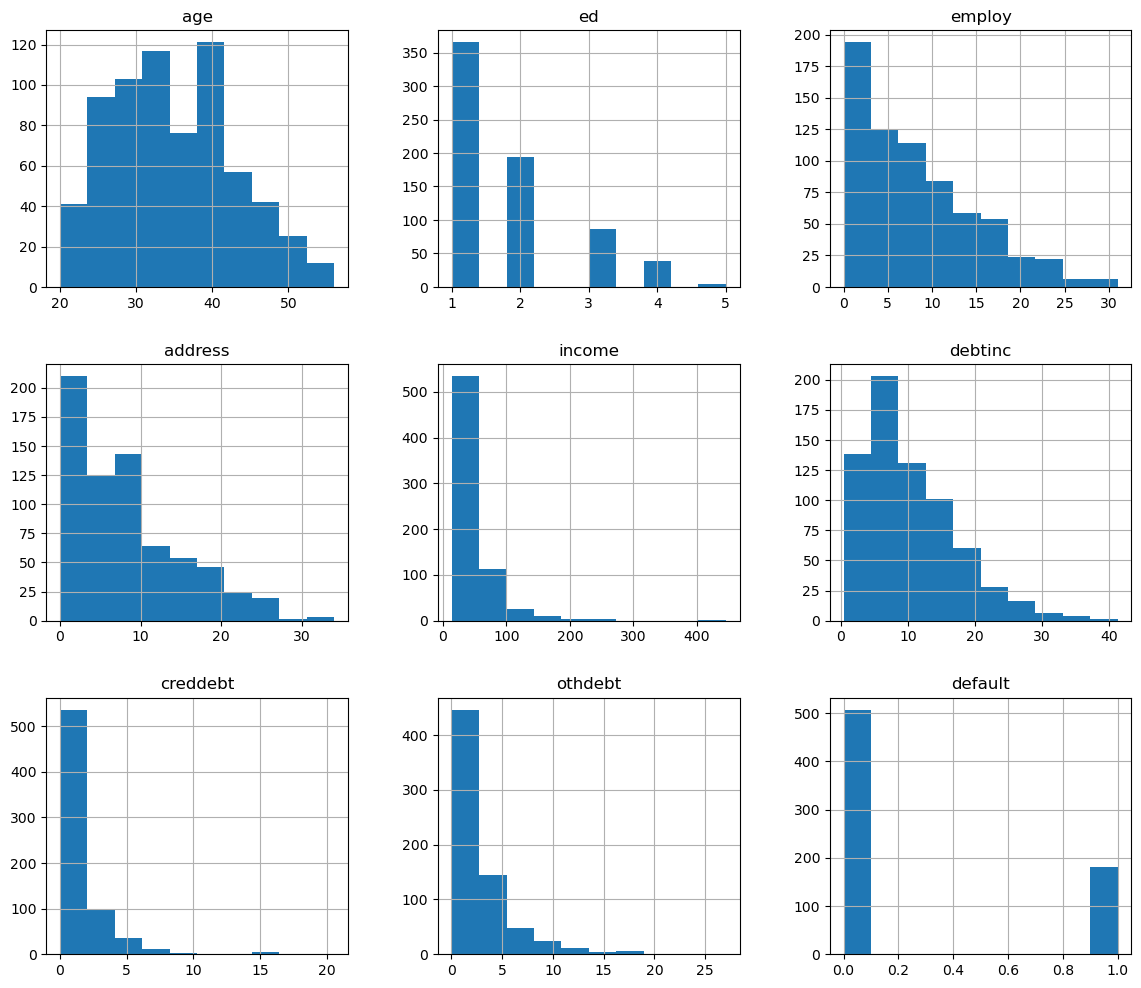

In [15]:
data.hist(figsize=(14,12))

In [16]:
data.isna().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

<Axes: >

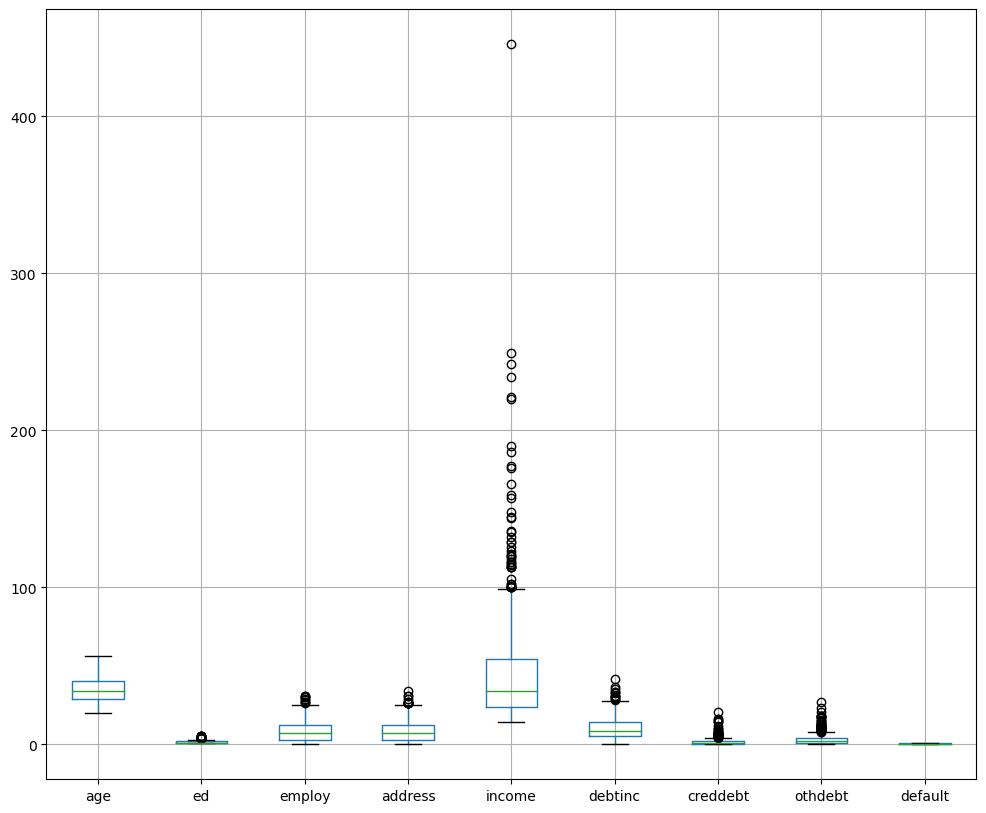

In [17]:
data.boxplot(figsize=(12,10))

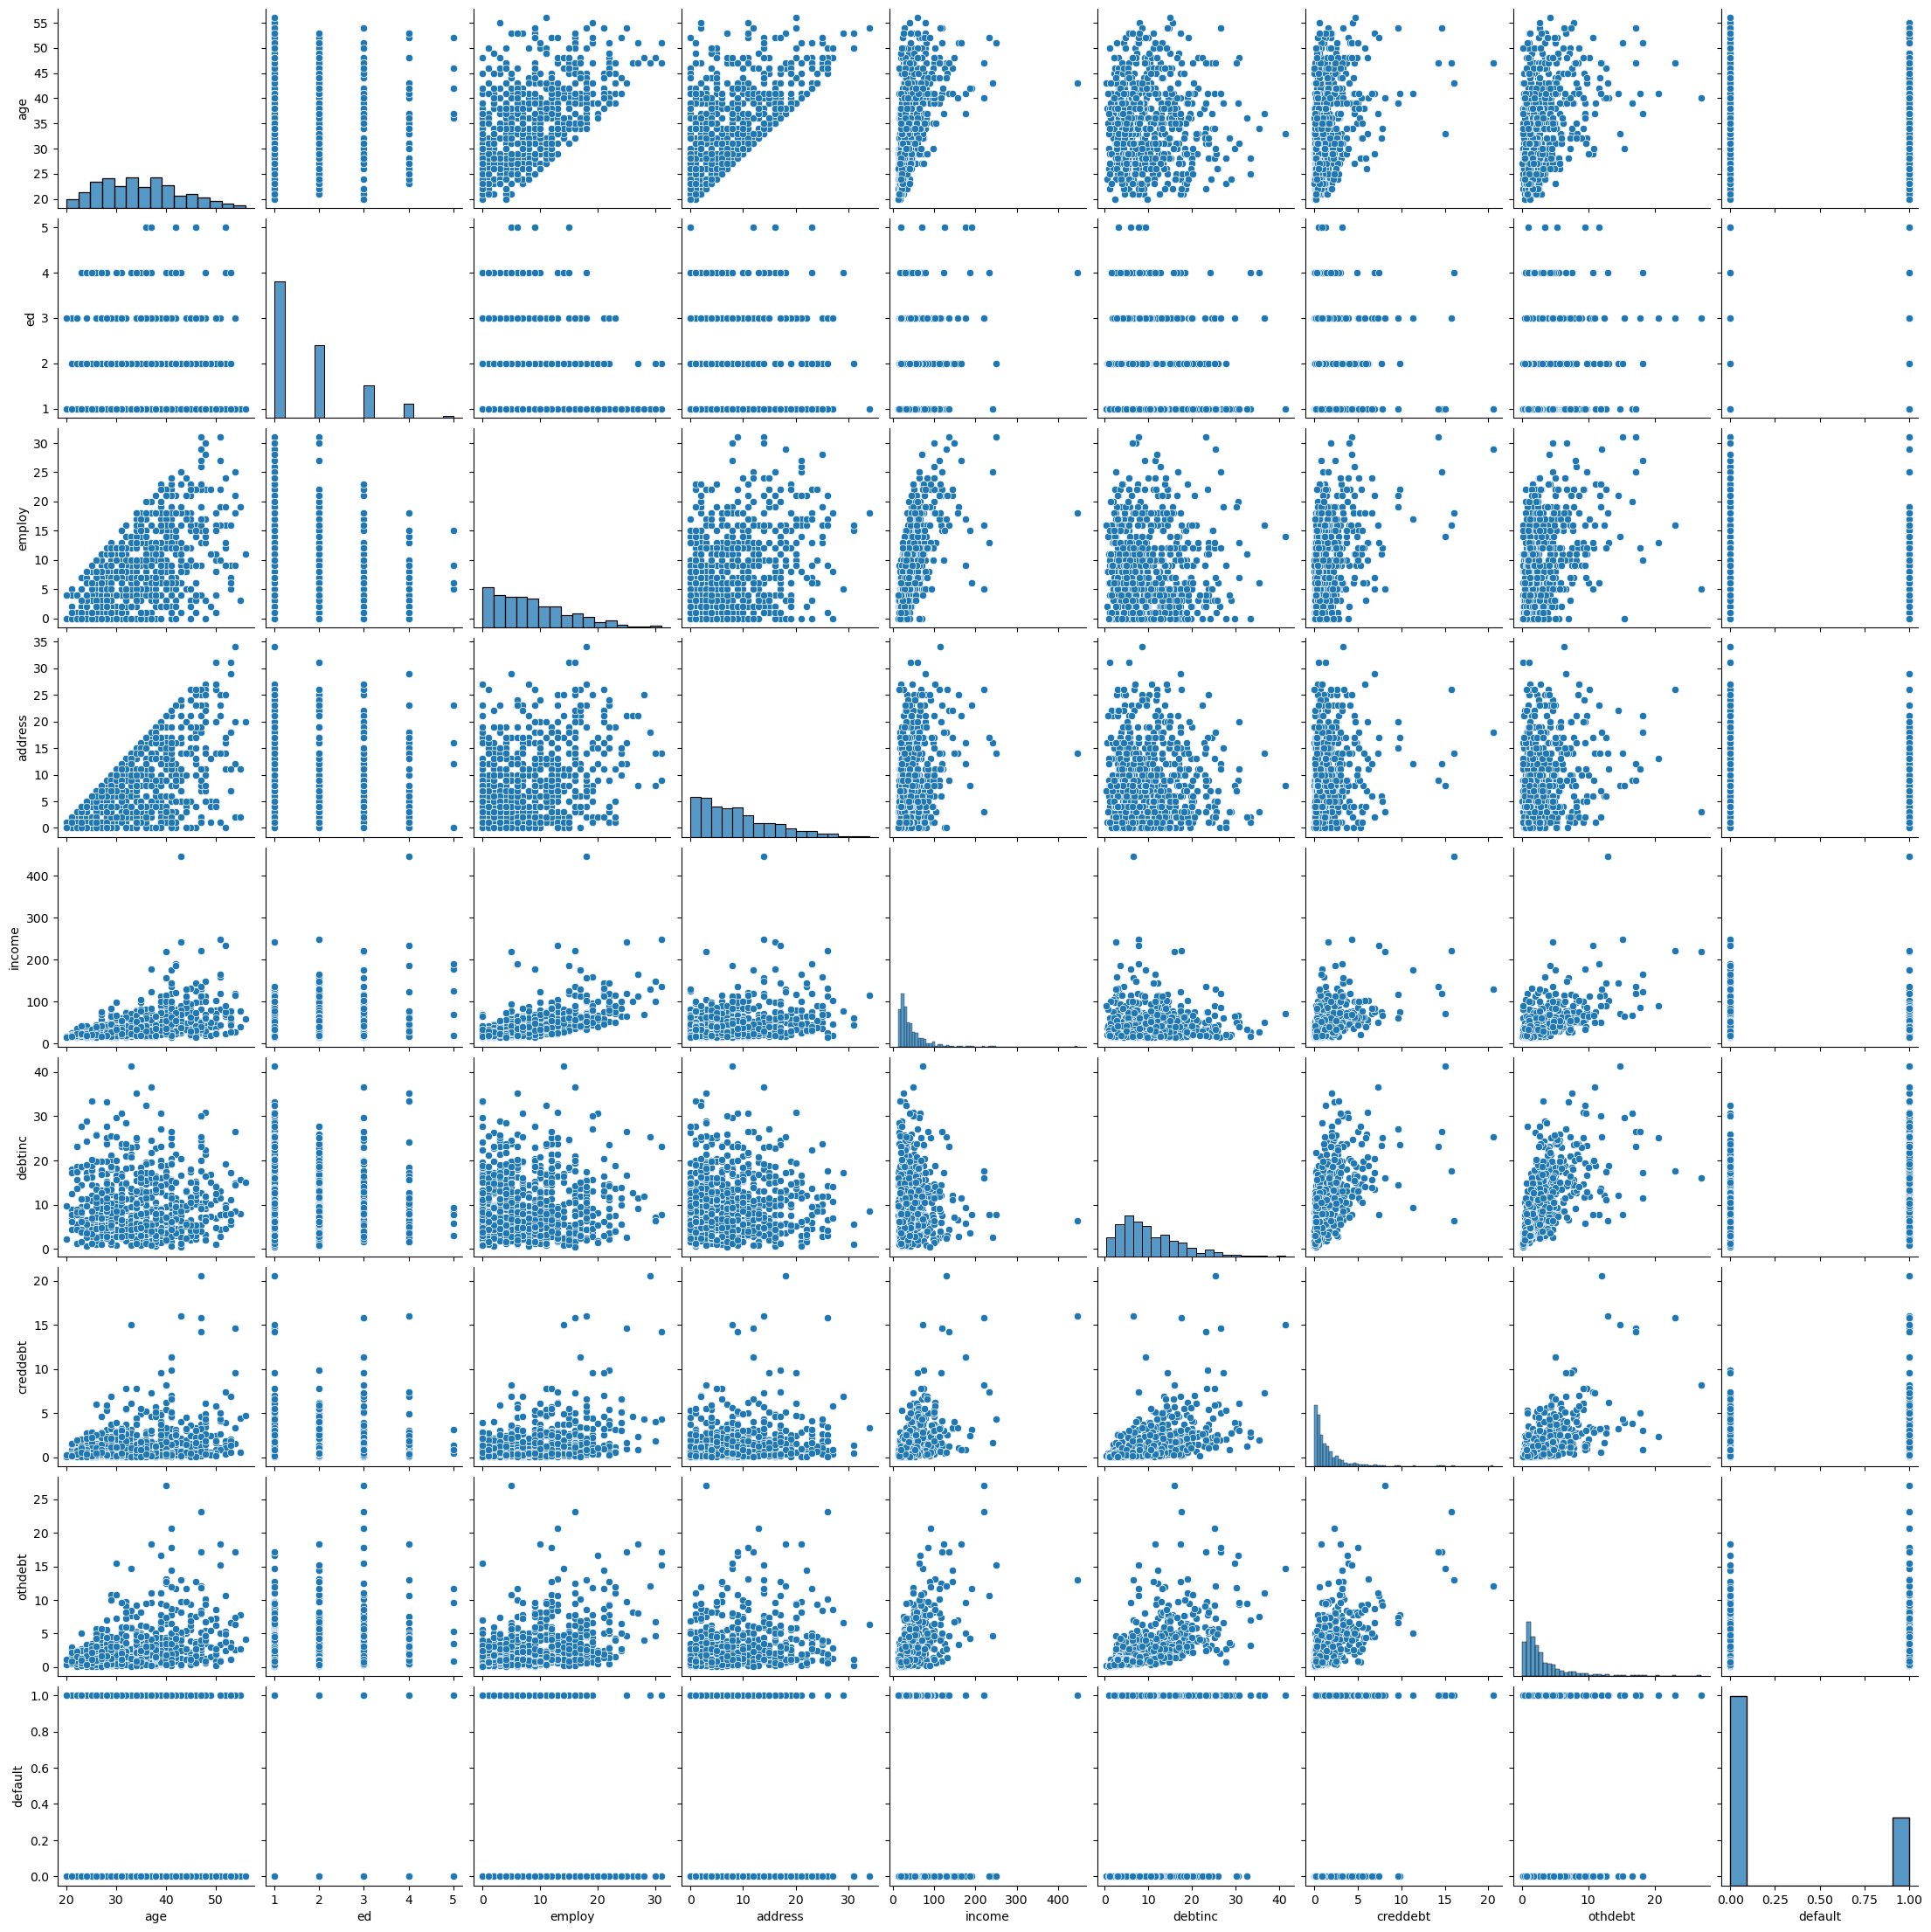

In [19]:
sns.pairplot(data)

In [20]:
x=data.iloc[:,:-1]
x.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt
0,41,3,17,12,176,9.3,11.359392,5.008608
1,27,1,10,6,31,17.3,1.362202,4.000798
2,40,1,15,14,55,5.5,0.856075,2.168925
3,41,1,15,14,120,2.9,2.658720,0.821280
4,24,2,2,0,28,17.3,1.787436,3.056564


In [21]:
y=data.iloc[:,-1:]
y.head()

,default
0,1
1,0
2,0
3,0
4,1


In [22]:
x.shape

(688, 8)

In [23]:
y.shape

(688, 1)

In [24]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=42)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)


****************Training Data Shape********************

Training data-X- Shape:	 (516, 8)

Training data-y- Shape:	 (516, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (172, 8)

Testing data(y-Outcome) Shape:	 (172, 1)


In [25]:
support_reg=SVR()
print('*'*100)
print('Hyperparameter:\n',support_reg.get_params())
print('*'*100)
support_reg.fit(xtrain,ytrain)
ypred=support_reg.predict(xtest)
print('Predicted price:\n',ypred)
print('*'*100)
print('Mean Squared Error:\t',mean_squared_error(ytest,ypred))
print()
print('RMSE:\t',np.sqrt(mean_squared_error(ytest,ypred)))
print()
print('R-Square value:\t',r2_score(ytest,ypred))

****************************************************************************************************
Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
****************************************************************************************************
Predicted price:
 [-3.18613665e-02  6.01813459e-01  1.77809867e-01  1.48839105e-01
  2.06597706e-02  1.66629212e-01 -1.03122793e-01  5.32107066e-01
  7.33830569e-01 -1.01049868e-01  1.21324380e-01  2.97670929e-01
  2.58020776e-01 -7.92684232e-02  9.04314515e-02  2.54528118e-01
 -6.22442950e-02  6.36082302e-02 -7.59160191e-03  1.04795846e-01
  1.57566596e-01  1.03887763e-01 -2.72703787e-02  2.65625179e-01
  3.33605049e-01  9.13074690e-02  1.03180386e-01  1.64907502e-01
  1.46316487e-01 -1.99739005e-02 -4.86643260e-04  4.10897337e-01
  3.38202834e-01  2.56074765e-02  2.82172825e-01  1.49556114e-01
  6

C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
support_reg=SVR(kernel='linear')
print('='*100)
print('Hyperparameter:\n',support_reg.get_params())
print('='*100)
#Train phase
support_reg.fit(xtrain,ytrain)
#Testing phase
ypred=support_reg.predict(xtest)
print('Predicted price:\n',ypred)
print('='*100)
#Performance measures
print('Mean Squared Error:\t',mean_squared_error(ytest,ypred))
print()
print('RMSE:\t',np.sqrt(mean_squared_error(ytest,ypred)))
print()
print('R-Square value:\t',r2_score(ytest,ypred))

Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted price:
 [ 1.69781019e-02  3.35606881e-01  1.96121400e-01  2.17329686e-01
  4.35374532e-02  1.89596905e-01 -7.78779149e-02  2.54441651e-01
  5.34749778e-01 -1.54266819e-01  1.09178546e-01  3.76297605e-01
  1.70417959e-01 -7.01356074e-02  6.34886307e-02  2.23103146e-02
 -8.92578510e-02  1.70123628e-01 -3.78479535e-02  1.01066956e-01
  1.42330326e-01  2.51796917e-01  1.81168678e-02  2.64679494e-01
  3.61179640e-01  1.04306081e-01  4.25800888e-02  1.53803264e-01
  1.19705142e-01 -2.00138770e-02  4.27993783e-02  4.36138748e-01
  2.13470092e-01  7.63200620e-02  2.56693316e-01  7.86097502e-02
  8.98668648e-02 -1.58467489e-02  2.57739327e-01 -2.40012616e-02
  2.83768217e-01  3.13760002e-02  1.05423971e-01 -1.24849816e-01
  9.97250075e-02  3.97997161e-02 -8.84570552e-02  7.52182660e-02
  4.46084374e-02  1.25049801e-01 -5.94502455e-02  5.17758381e-02
 -1.21074133e-02  8.35667798e-02  1.83224233e-01  4.39050296e-01
 -3.40912944e-02 -1.23626892e-01 -1.22874972e-01  3.50823702e-02
  1.809

In [27]:
support_reg=SVR(kernel='sigmoid')
print('='*100)
print('Hyperparameter:\n',support_reg.get_params())
print('='*100)
support_reg.fit(xtrain,ytrain)
ypred=support_reg.predict(xtest)
print('Predicted price:\n',ypred)
print('='*100)
print('Mean Squared Error:\t',mean_squared_error(ytest,ypred))
print()
print('RMSE:\t',np.sqrt(mean_squared_error(ytest,ypred)))
print()
print('R-Square value:\t',r2_score(ytest,ypred))

Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Predicted price:
 [ 4.95513107e+00  9.16517615e-01  2.19579515e+00  1.89717376e-01
  1.62801989e+00 -2.89945695e+00 -3.99109724e-01 -3.51375554e-01
  2.00406605e+00 -4.99616423e-01  1.45127387e+00 -2.15423571e+01
  7.79377132e-01  3.79284638e+00  1.50953794e+00 -3.96435127e+01
 -3.14060985e+00  1.19948374e+00 -1.49213468e+01  2.66828971e+00
 -5.13126610e+00 -1.69050449e+01  4.94336437e+00  1.43357094e+00
  1.29900123e+00  1.80002979e+00 -3.21027629e+01  1.30277647e+00
  3.77360762e+00  6.77622206e-01 -7.13727625e+00  7.21835384e-03
  2.38121887e+00  1.01698401e+00 -4.00429912e+00  1.73346544e-01
  4.60472509e+00  2.04100535e+00  5.08260167e+00 -2.21576249e+00
 -1.85480964e+01 -2.35670533e+01 -5.36288634e+00 -2.05702990e+00
  1.34045135e+00  5.06642757e+00 -8.44785479e+00  2.48919831e+00
  1.67

C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
support_reg=SVR(kernel='poly')
print('='*100)
print('Hyperparameter:\n',support_reg.get_params())
print('='*100)
support_reg.fit(xtrain,ytrain)
ypred=support_reg.predict(xtest)
print('Predicted price:\n',ypred)
print('='*100)
print('Mean Squared Error:\t',mean_squared_error(ytest,ypred))
print()
print('RMSE:\t',np.sqrt(mean_squared_error(ytest,ypred)))
print()
print('R-Square value:\t',r2_score(ytest,ypred))

Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Predicted price:
 [ 6.08718661e-02  5.73399127e-01  1.70204088e-01  1.46558312e-01
  7.02083897e-02  1.45244428e-01 -1.15869517e-02  2.00094953e-01
  3.71585324e-01  5.28023221e-03  1.22306567e-01  3.75756887e-01
  1.40207016e-01  4.07919745e-02  9.22360317e-02  2.74241244e-01
  2.22497827e-02  8.21355044e-02 -1.14870956e-01  8.39271193e-02
  2.01083749e-01  1.56854494e-01  6.04565135e-02  2.40525191e-01
  2.74606200e-01  1.04887293e-01  3.18822627e-02  1.50538221e-01
  1.03857741e-01  4.56077135e-02 -8.70978896e-05  3.58229568e-01
  1.74060249e-01  7.51623400e-02  2.64032473e-01  8.99784371e-02
  1.03713765e-01  4.61658346e-02  1.83479742e-01 -3.48673278e-02
  1.60998892e-01 -4.41354232e-02  8.89414767e-02 -3.39148136e-02
  7.18570672e-02  7.19398515e-02 -2.54724255e-02  2.94435913e-02
  9.26455

C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\Users\user\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


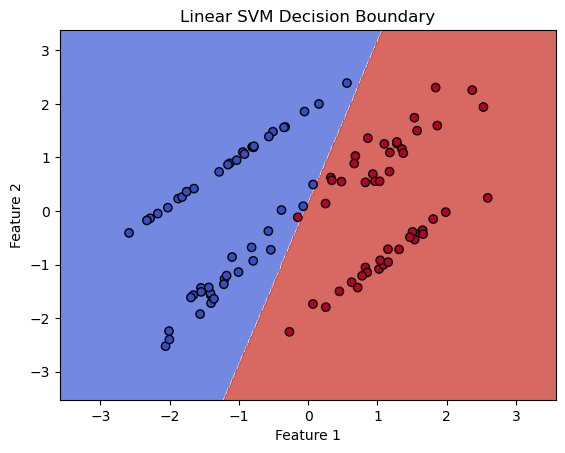

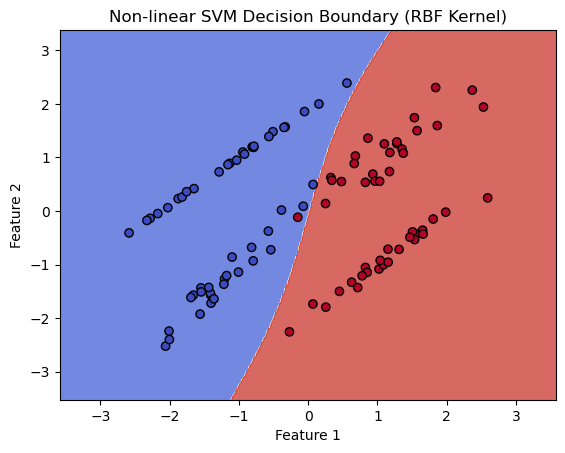

In [29]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC, SVC
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

linear_svm_model = LinearSVC(C=1)
linear_svm_model.fit(X, y)


non_linear_svm_model = SVC(C=1, kernel='rbf', gamma=0.1)
non_linear_svm_model.fit(X, y)


def plot_decision_boundary(model, X, y, title):
    h = .02  
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot decision boundaries for both models
plot_decision_boundary(linear_svm_model, X, y, 'Linear SVM Decision Boundary')
plot_decision_boundary(non_linear_svm_model, X, y, 'Non-linear SVM Decision Boundary (RBF Kernel)')

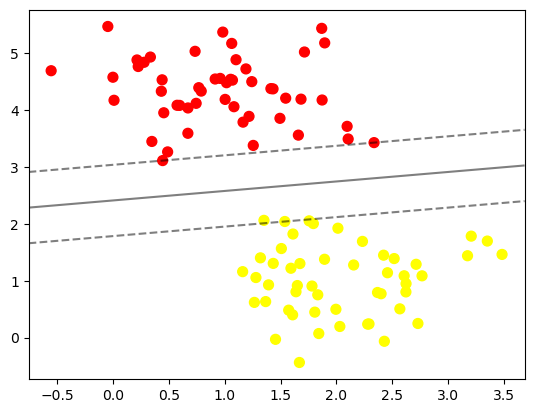

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.60)

model = SVC(kernel='linear', C=1)
model.fit(X, y)

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

   
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])


    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')


plot_svc_decision_function(model)


In [31]:
# Performance metrics for linear SVM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
linear_accuracy = accuracy_score(ytest, y_pred_linear)
linear_precision = precision_score(ytest, y_pred_linear, average='weighted')
linear_recall = recall_score(ytest, y_pred_linear, average='weighted')
linear_f1 = f1_score(ytest, y_pred_linear, average='weighted')
linear_conf_matrix = confusion_matrix(ytest, y_pred_linear)

# Performance metrics for non-linear SVM
non_linear_accuracy = accuracy_score(ytest, y_pred_non_linear)
non_linear_precision = precision_score(ytest, y_pred_non_linear, average='weighted')
non_linear_recall = recall_score(ytest, y_pred_non_linear, average='weighted')
non_linear_f1 = f1_score(ytest, y_pred_non_linear, average='weighted')
non_linear_conf_matrix = confusion_matrix(ytest, y_pred_non_linear)

# Display the results
print("******************Linear SVM Performance Metrics*********************\n")
print(f"Accuracy: {linear_accuracy:.4f}")
print(f"Precision: {linear_precision:.4f}")
print(f"Recall: {linear_recall:.4f}")
print(f"F1 Score: {linear_f1:.4f}")
print("Confusion Matrix:")
print(linear_conf_matrix)

print("\n******************Non-linear SVM Performance Metrics**********************\n")
print(f"Accuracy: {non_linear_accuracy:.4f}")
print(f"Precision: {non_linear_precision:.4f}")
print(f"Recall: {non_linear_recall:.4f}")
print(f"F1 Score: {non_linear_f1:.4f}")
print("Confusion Matrix:")
print(non_linear_conf_matrix)

NameError: name 'y_pred_linear' is not defined